In [1]:
import tomotopy as tp
import numpy as np
import pandas as pd
import re
import os
import time
import itertools
import konlpy
from kiwipiepy import Kiwi
from hanspell import spell_checker
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pyLDAvis


In [2]:
df=pd.read_csv('activity.csv',encoding='utf-8-sig',header=0, dtype={'score':np.str})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_title  2537 non-null   object 
 1   review        2537 non-null   object 
 2   score         2537 non-null   object 
 3   real_date     2537 non-null   object 
 4   year          2537 non-null   float64
 5   month         2537 non-null   float64
 6   type          2272 non-null   object 
 7   dataset       2500 non-null   object 
dtypes: float64(2), object(6)
memory usage: 158.7+ KB


C:\Users\jenny\AppData\Local\Temp/ipykernel_24368/2320953125.py:1: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df=pd.read_csv('activity.csv',encoding='utf-8-sig',header=0, dtype={'score':np.str})


In [3]:
df[df['dataset'].isnull()]

,review_title,review,score,real_date,year,month,type,dataset
49,"코미디, 액션으로 가득한 엔터테인먼트를 통해 자리를 장식 할 수 있습니다!",우리가 좌석을 확보하기 위해 우리 여행에 앞서 온라인으로 표를 예약하러 갔을 정도로...,5,2018년 10월,2018.0,10.0,가족,NaN
173,리움 펼치지 이루어가는 기업이기 때문이었습니다 현대적,"""현대""및 ""현대"" 조항을 종종 서로 바꿔서, 하지만 사람들은 기민한 정보는 알이 ...",5,2015년 2월,2015.0,2.0,친구,NaN
193,팩 인바강은,덕분에 즐거운 시간을! 내 마음에 드는 것은 제가 할 수 있는 미술관이 있을 때는 ...,5,2015년 5월,2015.0,5.0,개인,NaN
218,아름다운 박물관을 방문하는,이 박물관에서 볼 수 있는 호텔을 찾는데 itaewan 확인했습니다. 한강 에서 짧...,4,2015년 10월,2015.0,10.0,개인,NaN
283,There is mixing place with Korean traditions a...,"저희 부부(유아 동반)는 할인대상이 아니어서 1인당 10,000원짜리 표를 끊고 상...",4,2017년 5월,2017.0,5.0,가족,NaN
354,꼭 모든 관광,찾은 큰 기념물이 좋았죠 박물관. 저는 조언에 날씨좋은날 에 대한 복잡한 (적어도 ...,5,2015년 1월,2015.0,1.0,친구,NaN
393,시간 여행을!,전쟁기념관은 정말 놀라웠습니다. 그래서 문제가 많은 생각에 결국 하루에 레이아웃 및...,5,2015년 3월,2015.0,3.0,개인,NaN
629,민족 주의 와 한국 전쟁,"여기까지 오는 데, 내리지 통해ns, #12 싱출구가 을 (에 표시). 직진 하는 ...",4,2015년 8월,2015.0,8.0,개인,NaN
634,서울에 있는 (무료) 꼭 관광명소,서울에 100% 무료 방문하기 좋은 곳! 좋은 하루 반나절 또는 전체를 통해 길을 ...,5,2015년 8월,2015.0,8.0,커플,NaN
692,"가슴아프, 세부, 아닌 즐거운 기념 박물관.",그럼 분명: 이는 보다 훨씬 더 큰 동상 들 때문이에요. 그 뒤에 있는 거대한 박물...,5,2015년 9월,2015.0,9.0,NaN,NaN


In [4]:
#결측치 데이터 지우기
df.dropna(subset=['dataset'], how='any', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2536
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review_title  2500 non-null   object 
 1   review        2500 non-null   object 
 2   score         2500 non-null   object 
 3   real_date     2500 non-null   object 
 4   year          2500 non-null   float64
 5   month         2500 non-null   float64
 6   type          2237 non-null   object 
 7   dataset       2500 non-null   object 
dtypes: float64(2), object(6)
memory usage: 175.8+ KB


In [5]:
import konlpy
stop_list=['우리','함께','있습니다']
def tokenize_korean_text(text):
    text = re.sub(r'[^,.?!\w\s]','', text)
    
    okt = konlpy.tag.Okt()
    Okt_morphs = okt.pos(text)
    
    words = []
    for word, pos in Okt_morphs:
        if not pos == 'Josa' and not pos =='Punctuation' and not pos =='Foreign' and len(word) > 1 and word not in stop_list :
            words.append(word)
    ## word를 이어붙인 string 형태가 아닌 word의 list를 return해주는 게 sklearn lda 준비 과정과의 차이
            
    return words

In [6]:
tokenized_list2 = []
a=df['dataset'].values
for text in range(len(a)):
    tokenized_list2.append(tokenize_korean_text(a[text]))

In [7]:
model = tp.DMRModel(k=20, alpha=0.1, eta=0.01, min_cf=6,rm_top=3,tw=tp.TermWeight.IDF)

key=df['score'].values
value=tokenized_list2


for pairs in zip(key, value):
    try :
        model.add_doc(pairs[1],metadata=pairs[0]) # tokenize함수를 이용해 전처리한 결과를 add_doc에 넣습니다.
    except RuntimeError :
        pass
        
               
model.train(0)
print('Total docs:', len(model.docs))
print('Total words:', model.num_words)
print('Vocab size:', model.num_vocabs)
 

Total docs: 2500
Total words: 59973
Vocab size: 1647


In [8]:
model.train(0)
print('Num docs:{}, Num Vocabs:{}, Total Words:{}'.format(len(model.docs), len(model.used_vocabs), model.num_words))
print('Removed Top words: ', *model.removed_top_words)

# Let's train the model
for i in range(0, 1000, 20):
    model.train(20)

model.summary()

Num docs:2500, Num Vocabs:1647, Total Words:59973
Removed Top words:  박물관 있는 한국
<Basic Info>
| DMRModel (current version: 0.12.2)
| 2500 docs, 59973 words
| Total Vocabs: 9086, Used Vocabs: 1647
| Entropy of words: 6.49067
| Entropy of term-weighted words: 6.97938
| Removed Vocabs: 박물관 있는 한국
| Metadata of docs and its distribution
|  5: 1547
|  4: 727
|  3: 190
|  1: 12
|  2: 24
|
<Training Info>
| Iterations: 1000, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -6.75960
|
<Initial Parameters>
| tw: TermWeight.IDF
| min_cf: 6 (minimum collection frequency of words)
| min_df: 0 (minimum document frequency of words)
| rm_top: 3 (the number of top words to be removed)
| k: 20 (the number of topics between 1 ~ 32767)
| alpha: [0.1] (an initial value of exponential of mean of normal distribution for `lambdas`, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dir

==== Coherence : c ====
Average: 0.7761264581233264 
Per Topic: [0.869075334072113, 0.6237658083438873, 0.7827938437461853, 0.8334603905677795, 0.8158135682344436, 0.8075983703136445, 0.7310474023222924, 0.8428113281726837, 0.8052219033241272, 0.5707092016935349, 0.8143377840518952, 0.8021339654922486, 0.7099756211042404, 0.794553953409195, 0.8159086167812347, 0.7830849826335907, 0.7723186492919922, 0.8047365069389343, 0.7606265425682068, 0.7825553894042969]


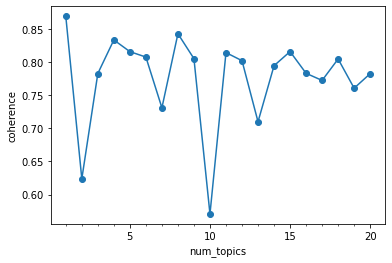

In [9]:
# calculate coherence using preset
ax=plt.axes()
coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]
print('==== Coherence : c ====')
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
x=range(1,21,1)
plt.plot(x, coherence_per_topic,marker='o')
plt.xlabel("num_topics")
plt.ylabel("coherence")
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.show()
print()

위 결과에서 14개일 때 가장 높은 응집도를 보였기 때문에 토픽을 14개로 설정하였다.

In [10]:
model = tp.DMRModel(k=8 , alpha=0.1, eta=0.01, min_df=6,rm_top=3,tw=tp.TermWeight.IDF)

key=df['score'].values
value=tokenized_list2


for pairs in zip(key, value):
    try :
        model.add_doc(pairs[1],metadata=pairs[0]) # tokenize함수를 이용해 전처리한 결과를 add_doc에 넣습니다.
    except RuntimeError :
        pass

model.train(0)
print('Total docs:', len(model.docs))
print('Total words:', model.num_words)
print('Vocab size:', model.num_vocabs)
 
 
 
for i in range(200):
    model.train(1)
    
for i in range(model.k):
    res = model.get_topic_words(i, top_n=10)
    print('Topic #{}'.format(i), end='\t')
    print(', '.join(w for w, p in res))

Total docs: 2500
Total words: 59685
Vocab size: 1600
Iteration 0	LL per word: -9.17912447560867
Iteration 1	LL per word: -8.35947929130482
Iteration 2	LL per word: -7.922335737425247
Iteration 3	LL per word: -7.706947116267619
Iteration 4	LL per word: -7.589056958297061
Iteration 5	LL per word: -7.516907542649122
Iteration 6	LL per word: -7.475096941508275
Iteration 7	LL per word: -7.441151313191999
Iteration 8	LL per word: -7.414772137632509
Iteration 9	LL per word: -7.3913833592436085
Iteration 10	LL per word: -7.374233683174426
Iteration 11	LL per word: -7.357580551166287
Iteration 12	LL per word: -7.343497542574135
Iteration 13	LL per word: -7.3253707141458335
Iteration 14	LL per word: -7.317804186762822
Iteration 15	LL per word: -7.30236657091969
Iteration 16	LL per word: -7.288283535900019
Iteration 17	LL per word: -7.273560239846494
Iteration 18	LL per word: -7.26484757911424
Iteration 19	LL per word: -7.256191150144009
Iteration 20	LL per word: -7.250618087050051
Iteration 21	L

Iteration 180	LL per word: -6.9397077803538245
Iteration 181	LL per word: -6.940681765980976
Iteration 182	LL per word: -6.938443623528508
Iteration 183	LL per word: -6.939051099274713
Iteration 184	LL per word: -6.941414215937718
Iteration 185	LL per word: -6.937734328293251
Iteration 186	LL per word: -6.937046474697535
Iteration 187	LL per word: -6.937830484863428
Iteration 188	LL per word: -6.937581592923586
Iteration 189	LL per word: -6.9368083961457945
Iteration 190	LL per word: -6.938341321694398
Iteration 191	LL per word: -6.943756179837675
Iteration 192	LL per word: -6.944772448046926
Iteration 193	LL per word: -6.941943514901699
Iteration 194	LL per word: -6.940892135810729
Iteration 195	LL per word: -6.9377720883585114
Iteration 196	LL per word: -6.938152576601227
Iteration 197	LL per word: -6.93842716820555
Iteration 198	LL per word: -6.935190296674629
Iteration 199	LL per word: -6.934068034753022
Topic #0	미술관, 삼성, 리움, 이태원, 해설, 운영, 게임, 혼자, 월요일, 보면
Topic #1	아이, 어린이, 교육, 있어, 되

In [11]:
model.summary()

<Basic Info>
| DMRModel (current version: 0.12.2)
| 2500 docs, 59685 words
| Total Vocabs: 9086, Used Vocabs: 1600
| Entropy of words: 6.47285
| Entropy of term-weighted words: 6.95646
| Removed Vocabs: 박물관 있는 한국
| Metadata of docs and its distribution
|  5: 1547
|  4: 727
|  3: 190
|  1: 12
|  2: 24
|
<Training Info>
| Iterations: 200, Burn-in steps: 0
| Optimization Interval: 10
| Log-likelihood per word: -6.93566
|
<Initial Parameters>
| tw: TermWeight.IDF
| min_cf: 0 (minimum collection frequency of words)
| min_df: 6 (minimum document frequency of words)
| rm_top: 3 (the number of top words to be removed)
| k: 8 (the number of topics between 1 ~ 32767)
| alpha: [0.1] (an initial value of exponential of mean of normal distribution for `lambdas`, given as a single `float` in case of symmetric prior and as a list with length `k` of `float` in case of asymmetric prior.)
| eta: 0.01 (hyperparameter of Dirichlet distribution for topic - word)
| sigma: 1.0 (standard deviation of normal d

In [12]:
#감성점수 계산
print('Topic distributions by score')

df2=pd.DataFrame()
score_labels=['1','2','3','4','5']
for i in score_labels:
    df2[i+'score']=model.get_topic_prior(i)
df2['total']=df2.sum(axis=1)

total_sum=df2['total'].values
gamsung_sum=0
gamsung_list=[]
for i in range(model.k):
    a=df2.iloc[i,:-1].values
    gamsung_sum=(a[0]*1+a[1]*2+a[2]*3+a[3]*4+a[4]*5)/total_sum[i]
    gamsung_list.append(gamsung_sum)
    
df2['re_score']=gamsung_list
df2=df2.round(3)
df2.head(20)

Topic distributions by score


,1score,2score,3score,4score,5score,total,re_score
0,0.063,0.021,0.065,0.099,0.022,0.269,2.981
1,0.035,0.023,0.027,0.010,0.054,0.149,3.171
2,0.026,0.084,0.027,0.006,0.015,0.157,2.364
3,0.093,0.213,0.340,0.112,0.087,0.844,2.867
4,0.042,0.024,0.020,0.004,0.005,0.094,1.994
5,0.028,0.078,0.107,0.248,0.264,0.724,3.886
6,0.310,0.307,0.484,0.189,0.499,1.789,3.147
7,0.197,0.894,0.090,0.277,0.465,1.923,2.957


In [13]:
#각 토픽 별 상위 10개 단어 추출
word_list=[]
for i in range(model.k):
    a=model.get_topic_words(i, top_n=10)
    word_list.append([x[0] for x in a])

df2['word_list']=word_list
df2.head(15)

,1score,2score,3score,4score,5score,total,re_score,word_list
0,0.063,0.021,0.065,0.099,0.022,0.269,2.981,"[미술관, 삼성, 리움, 이태원, 해설, 운영, 게임, 혼자, 월요일, 보면]"
1,0.035,0.023,0.027,0.010,0.054,0.149,3.171,"[아이, 어린이, 교육, 있어, 되어, 비행기, 있어서, 탱크, 많고, 전쟁기념관]"
2,0.026,0.084,0.027,0.006,0.015,0.157,2.364,"[재미있는, 그것, 사진, 공연, 재미, 극장, 당신, 난타, 재미있고, 친구]"
3,0.093,0.213,0.340,0.112,0.087,0.844,2.867,"[사진, 얼음, 가격, 아이, 트릭, 친구, 재미있는, 시간, 재미, 티켓]"
4,0.042,0.024,0.020,0.004,0.005,0.094,1.994,"[전시, 작품, 미술관, 너무, 기획, 입장료, 리움, 부족한, 있어, 모네]"
5,0.028,0.078,0.107,0.248,0.264,0.724,3.886,"[좋아요, 관람, 중앙, 외국인, 전시, 생각, 있어서, 우리나라, 방문, 역사]"
6,0.310,0.307,0.484,0.189,0.499,1.789,3.147,"[예술, 가이드, 시간, 건물, 아주, 여기, 하지, 합니다, 매우, 방문]"
7,0.197,0.894,0.090,0.277,0.465,1.923,2.957,"[전쟁, 역사, 많은, 무료, 표시, 기념관, 모든, 정보, 시간, 매우]"


In [14]:
 # extract candidates for auto topic labeling
extractor = tp.label.PMIExtractor(min_cf=5, min_df=5, max_len=5, max_cand=10000, normalized=True)
cands = extractor.extract(model)

labeler = tp.label.FoRelevance(model, cands, min_df=5, smoothing=1e-2, mu=0.25)
for k in range(model.k):
    print("== Topic #{} ==".format(k))
    print("Labels:", ', '.join(label for label, score in labeler.get_topic_labels(k, top_n=5)))
    for word, prob in model.get_topic_words(k, top_n=10):
        print(word, prob, sep='\t')
    print()

== Topic #0 ==
Labels: 삼성 운영, 운영 하는, 삼성, 미술관, 삼성 미술관 리움
미술관	0.09616761654615402
삼성	0.0537172332406044
리움	0.04024825617671013
이태원	0.03654240444302559
해설	0.02642422541975975
운영	0.024440042674541473
게임	0.024391865357756615
혼자	0.021006885915994644
월요일	0.0202946700155735
보면	0.020243370905518532

== Topic #1 ==
Labels: 전시 되어 있어, 어린이 박물관, 있어 아이, 어린이, 놀기
아이	0.038841720670461655
어린이	0.030664868652820587
교육	0.018329644575715065
있어	0.017325591295957565
되어	0.016233371570706367
비행기	0.015643462538719177
있어서	0.015608884394168854
탱크	0.014617226086556911
많고	0.014156941324472427
전쟁기념관	0.013862023130059242

== Topic #2 ==
Labels: 재미있는, 그것, 재미있고, 재미, 당신
재미있는	0.02071213349699974
그것	0.017526062205433846
사진	0.016362585127353668
공연	0.014567672275006771
재미	0.01446912158280611
극장	0.011800244450569153
당신	0.011704475618898869
난타	0.011675316840410233
재미있고	0.01108466275036335
친구	0.010895098559558392

== Topic #3 ==
Labels: 얼음, 티켓, 사진, 얼음 박물관, 카메라
사진	0.0346873477101326
얼음	0.018128808587789536
가격	0.012780299410223961

In [15]:
df3=pd.DataFrame()
df3['docs']=tokenized_list2
df3['score']=df['score'].values
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   docs    2500 non-null   object
 1   score   2500 non-null   object
dtypes: object(2)
memory usage: 39.2+ KB


In [16]:
#빈도 구하기

topic_num=[]
temp1=[] #토픽번호
temp2=[] #분포율
for i in range(len(model.docs)):
    a=model.docs[i].get_topics()
    temp1.append([x[0] for x in a])
    temp2.append([x[1] for x in a])
for i in range(len(temp1)):
    if temp2[i][0] >= 0.5:
        topic_num.append(temp1[i][0])
    else :
        topic_num.append(np.NaN)

In [17]:
df3['topic_num']=topic_num
df3[df3['topic_num'].isnull()]

,docs,score,topic_num
2,"[쇼핑, 즐길, 있는, 공연, 명동, 한가운데, 있어, 접근성, 좋습니다, 유네스코...",3,NaN
4,"[철저하게, 즐겁게, 남편, 공연, 즐길, 있었다, 재능, 넘치게, 있는, 캐스트,...",5,NaN
6,"[즐겁지, 표시, 재미있었습니다, 경우, 없습니다, 표시, 이전, 명동, 극장, 표...",4,NaN
7,"[매우, 즐거운, 온라인, 예약, 할인, 가격, 사전, 예약, 받지, 않고, 카운터...",4,NaN
11,"[모든, 커버, 주는, 처음, 철저하게, 재미있었습니다, 기대, 도구, 사용, 하여...",5,NaN
...,...,...,...
2492,"[전체, 패키지, 받으십시오, 트릭, 아이, 지엄, 아이스, 하나, VR, 게임, ...",4,NaN
2494,"[그만한, 가치, 측면, 얼음, 박물관, 특히, 방문, 가치, 없습니다, 특히, 다...",5,NaN
2495,"[띄는, 까다로운, 매력, 어트랙션, 건물, 명확하고, 명백한, 표시, 없기, 때문...",4,NaN
2496,"[이상, 박물관, 이상, 흥분하지, 않습니다, 잊지, 경험, 홍익, 대학교, 않은,...",5,NaN


In [18]:
df4=df3.groupby(['topic_num','score'])['docs']
print(df4.size().reset_index(name='counts'))

    topic_num score  counts
0         0.0     4       1
1         0.0     5       7
2         1.0     3       3
3         1.0     4      21
4         1.0     5      16
5         2.0     3       2
6         2.0     4      28
7         2.0     5     103
8         3.0     1       4
9         3.0     2       3
10        3.0     3      24
11        3.0     4      39
12        3.0     5      59
13        4.0     4       5
14        4.0     5       4
15        5.0     1       2
16        5.0     2       2
17        5.0     3      27
18        5.0     4     141
19        5.0     5     243
20        6.0     1       1
21        6.0     2       7
22        6.0     3      35
23        6.0     4     135
24        6.0     5     313
25        7.0     2       2
26        7.0     3      35
27        7.0     4     142
28        7.0     5     388
